## Surrogate

100%|██████████| 1/1 [00:00<00:00, 212.36it/s]

Accuracy: 100.0
Mean episode length: 100.0
Last reward processor:
Estimated confusion matrix:


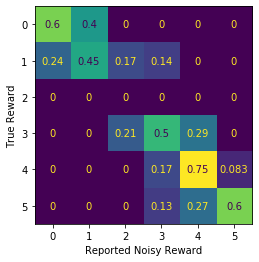

Reward sets:
(0, 0): [-2, -1, -1, 0, -2, -1, 0, 0, -1, -2, -2, -2]
(0, 1): [-1, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, -1, -1, 0, -1, -1, 0, 0, 0, 0]
(0, 2): [0, 0, -1, -1, -1, -1, -1, 0, -3, 0, 0, -1]
(0, 3): [-3, -3, -2, -3, -1, -2, -2, -1, -1, -1, -2, -3]
(0, 4): [-2, -3, -4, -3, -3, -2, -4, -4, -3, -2, -3, -3, -4, -3]
(0, 5): [-4, -4, -4, -4, -3, -3, -4, -4, -5, -4, -4, -4]
(0, 6): [-5, -5, -5, -3, -4, -3, -4, -5, -5, -4, -4, -5, -5, -5, -5, -5]
Reward set counts:
Key (0, 0): 12 items
Key (0, 1): 21 items
Key (0, 2): 12 items
Key (0, 3): 12 items
Key (0, 4): 14 items
Key (0, 5): 12 items
Key (0, 6): 16 items


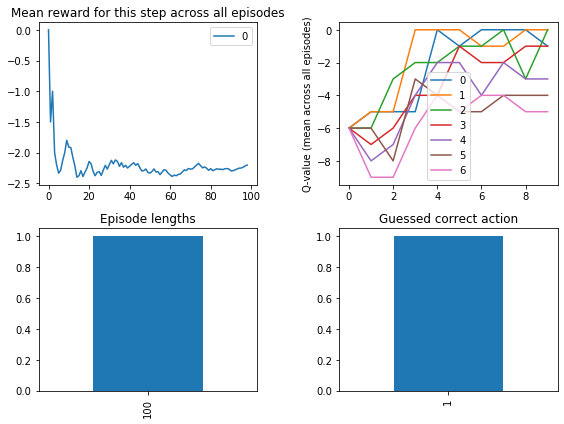

array([-1.,  0.,  0., -1., -3., -4., -5.])

In [1]:
import utils
from utils import *

def default_params():
    """ These are the default parameters used in the framework. """
    return {
            # Runner parameters
            'max_steps': 120,
            'num_episodes': 100,
            'num_actions': 7, 
            'start_action': 0, 
            'correct_action': 1,    # Zero indexed 
            # Optimization parameters
            'alpha': 0.5,
            'alpha_decay': 40,
            'alpha_min': 0.001,
            # Exploration parameters
            'epsilon': 1,
            'epsilon_decay': 20,
            'epsilon_min': 0.01,    
            'gamma': 0.95,
            'plots': False,
            'noise': True,
            'surrogate': False,
            'surrogate_c_interval': 10,
            'surrogate_c_interval_min': 30,
           }

params_new = {
    'max_steps': 100,
    'num_episodes': 1,
    'plots': True, 
    'noise': True,
    'surrogate': True,
    'epsilon': 1.0,
    'epsilon_min': 1.0,
    # Optimization parameters
    'alpha': 1.0,
    # 'alpha_decay': 500,
    'alpha_min': 1,
    'convergence_count_start': 1000,    
    }
params = default_params() | params_new
plot_mean_q_values(params = params)